# Analysis of public perception on Autonomous Vehicles
## Overview
Many ideas are usually rejected by the general public due to disputes, which harms their adoption and commercialization. Microblogging services such as Twitter, Instagram, and Reddit have recently grown in popularity, allowing the general people to express their opinions and ideas on any subject more simply than ever before. My goal is to examine unlabeled Twitter data and use the sentiment analysis tool VADER in order to evaluate the general public's view of self-driving cars.

## About the data 
- Tweets were collected using the Twint library instead of the Twitter API as the API has limitations on the number of tweets that can be fetched.
- The total number of tweets collected was 35,476.

#### Importing all the libraries and downloading all the necessary dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import re

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from wordcloud import WordCloud

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to /home/achal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/achal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/achal/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


#### Data Exploration

In [2]:
# Reading the csv file
df = pd.read_csv("dataset.csv")
df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1510290921245577225,1510290921245577225,2022-04-02 21:49:50 India Standard Time,2022-04-02,21:49:50,530,625983546,sailordoom200,the hound of the basketballs,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1510290451026391041,1510290451026391041,2022-04-02 21:47:58 India Standard Time,2022-04-02,21:47:58,530,974140999118319616,hudson_chatbots,Emma Hudson,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1510289278097518593,1510289278097518593,2022-04-02 21:43:18 India Standard Time,2022-04-02,21:43:18,530,1048577584240451585,skum_noel,Noel Skum,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1510286317078433795,1510286317078433795,2022-04-02 21:31:32 India Standard Time,2022-04-02,21:31:32,530,510615330,roadsidemasters,RoadsideMASTERS.com,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1510286160244867077,1510286160244867077,2022-04-02 21:30:55 India Standard Time,2022-04-02,21:30:55,530,1316585227,psycholod,Andy Greenshaw,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35470,1466289263780188161,1466289263780188161,2021-12-02 11:42:57 India Standard Time,2021-12-02,11:42:57,530,861861525883158528,deep_in_depth,Deep_In_Depth,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
35471,1466289166371667969,1466289166371667969,2021-12-02 11:42:34 India Standard Time,2021-12-02,11:42:34,530,861861525883158528,deep_in_depth,Deep_In_Depth,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
35472,1466288913828483072,1466288913828483072,2021-12-02 11:41:34 India Standard Time,2021-12-02,11:41:34,530,861861525883158528,deep_in_depth,Deep_In_Depth,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
35473,1466286054177136643,1466286054177136643,2021-12-02 11:30:12 India Standard Time,2021-12-02,11:30:12,530,34713362,business,Bloomberg,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [3]:
# Descriptive statistics of the data
df.describe()

,id,conversation_id,timezone,user_id,replies_count,retweets_count,likes_count,video,near,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest
count,3.547500e+04,3.547500e+04,35475.0,3.547500e+04,35475.000000,35475.000000,35475.000000,35475.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.487862e+18,1.487541e+18,530.0,5.646231e+17,0.587146,1.159549,7.510839,0.197491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.231036e+16,1.642510e+16,0.0,5.431413e+17,32.727522,25.036165,521.671516,0.398112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.466286e+18,5.547237e+17,530.0,1.102000e+03,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.478472e+18,1.478442e+18,530.0,3.262042e+08,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.487532e+18,1.487457e+18,530.0,8.269117e+17,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.498318e+18,1.498282e+18,530.0,9.888054e+17,0.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.510291e+18,1.510291e+18,530.0,1.509981e+18,6029.000000,4540.000000,97491.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35475 entries, 0 to 35474
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               35475 non-null  int64  
 1   conversation_id  35475 non-null  int64  
 2   created_at       35475 non-null  object 
 3   date             35475 non-null  object 
 4   time             35475 non-null  object 
 5   timezone         35475 non-null  int64  
 6   user_id          35475 non-null  int64  
 7   username         35475 non-null  object 
 8   name             35474 non-null  object 
 9   place            17 non-null     object 
 10  tweet            35475 non-null  object 
 11  language         35475 non-null  object 
 12  mentions         35475 non-null  object 
 13  urls             35475 non-null  object 
 14  photos           35475 non-null  object 
 15  replies_count    35475 non-null  int64  
 16  retweets_count   35475 non-null  int64  
 17  likes_count 

#### Data Cleaning and Tokenizing

In [5]:
# Keeping only the rows with Enlgish language
df = df[df["language"] == "en"]
df["language"].value_counts()

en    33699
Name: language, dtype: int64

In [6]:
# Checking the number of duplicated rows
df["tweet"].duplicated(keep = "first").sum()

723

In [7]:
# Dropping duplicated rows
df = df.drop_duplicates(subset = "tweet", keep = "first")

In [8]:
# Just making sure
df["tweet"].duplicated(keep = "first").sum()

0

In [9]:
# Drop rows with missing values
df = df.dropna(subset = ["tweet"])

In [10]:
# Resetting the index of the dataframe
df = df.reset_index(drop = True)
df.shape

(32976, 36)

In [11]:
# Keeping only the date and tweet columns
df = df[["date", "tweet"]]
df

,date,tweet
0,2022-04-02,horse is the original self driving car
1,2022-04-02,I Used AI to Paint the 10 Most Beautiful Engli...
2,2022-04-02,Idea for an invention: a self-driving car that...
3,2022-04-02,“Not only do we think we’ll be 100% Locomation...
4,2022-04-02,Jean-François Bonnefon MIT Press (2021) Intere...
...,...,...
32971,2021-12-02,“The Cooperative Driving dataset is a syntheti...
32972,2021-12-02,New Synthetic AI Data May Improve Brain-Comput...
32973,2021-12-02,Simplified quantum computer can be made with o...
32974,2021-12-02,“It was a bit of a shock to have cars driving ...


In [12]:
# Creating a new column raw_tweet with identical values as tweet
df["raw_tweet"] = df["tweet"]
df

,date,tweet,raw_tweet
0,2022-04-02,horse is the original self driving car,horse is the original self driving car
1,2022-04-02,I Used AI to Paint the 10 Most Beautiful Engli...,I Used AI to Paint the 10 Most Beautiful Engli...
2,2022-04-02,Idea for an invention: a self-driving car that...,Idea for an invention: a self-driving car that...
3,2022-04-02,“Not only do we think we’ll be 100% Locomation...,“Not only do we think we’ll be 100% Locomation...
4,2022-04-02,Jean-François Bonnefon MIT Press (2021) Intere...,Jean-François Bonnefon MIT Press (2021) Intere...
...,...,...,...
32971,2021-12-02,“The Cooperative Driving dataset is a syntheti...,“The Cooperative Driving dataset is a syntheti...
32972,2021-12-02,New Synthetic AI Data May Improve Brain-Comput...,New Synthetic AI Data May Improve Brain-Comput...
32973,2021-12-02,Simplified quantum computer can be made with o...,Simplified quantum computer can be made with o...
32974,2021-12-02,“It was a bit of a shock to have cars driving ...,“It was a bit of a shock to have cars driving ...


In [13]:
# Initializing stop words and lemmatizer
lemma = WordNetLemmatizer()
stop_words = stopwords.words("english")

Cleaning the tweets and creating two new columns tokenized_tweet and whole_tweet

In [14]:
df["tokenized_tweet"] = df["tweet"].apply(lambda x: x.lower())
# Converting all the tweets into lowercase

df["tokenized_tweet"] = df["tokenized_tweet"].apply(lambda x: re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', str(x)))
# Replacing urls with a space

df["tokenized_tweet"] = df["tokenized_tweet"].apply(lambda x: re.sub('\$[a-zA-Z0-9]*', ' ', str(x)))
# Replacing words starting with $ symbol with a space

df["tokenized_tweet"] = df["tokenized_tweet"].apply(lambda x: re.sub('\@[a-zA-Z0-9]*', ' ', str(x)))
# Replacing words starting with @ symbol with a space

df["tokenized_tweet"] = df["tokenized_tweet"].apply(lambda x: re.sub('[^a-zA-Z\']', ' ', str(x)))
# Replacing everything which doesn't contain a letter or an apostrophe with a space

df["tokenized_tweet"] = df["tokenized_tweet"].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 1]))
# Removing words with single letters

df["tokenized_tweet"] = df["tokenized_tweet"].apply(lambda x: ' '.join([lemma.lemmatize(w) for w in nltk.wordpunct_tokenize(x) if w not in stop_words]))
# Tokenizing the tweets

df["tokenized_tweet"] = df["tokenized_tweet"].apply(lambda x: [lemma.lemmatize(w, nltk.corpus.reader.wordnet.VERB) for w in nltk.wordpunct_tokenize(x) if w not in stop_words])
# Removing stop words

df["whole_tweet"] = df["tokenized_tweet"].apply(lambda x: ' '.join(x))
# Joining the tokenized words into whole tweets 

In [15]:
df

,date,tweet,raw_tweet,tokenized_tweet,whole_tweet
0,2022-04-02,horse is the original self driving car,horse is the original self driving car,"[horse, original, self, drive, car]",horse original self drive car
1,2022-04-02,I Used AI to Paint the 10 Most Beautiful Engli...,I Used AI to Paint the 10 Most Beautiful Engli...,"[use, ai, paint, beautiful, english, word, ht,...",use ai paint beautiful english word ht ev futu...
2,2022-04-02,Idea for an invention: a self-driving car that...,Idea for an invention: a self-driving car that...,"[idea, invention, self, drive, car, mine, univ...",idea invention self drive car mine universe ' ...
3,2022-04-02,“Not only do we think we’ll be 100% Locomation...,“Not only do we think we’ll be 100% Locomation...,"[think, locomation, autonomous, vehicle, withi...",think locomation autonomous vehicle within nex...
4,2022-04-02,Jean-François Bonnefon MIT Press (2021) Intere...,Jean-François Bonnefon MIT Press (2021) Intere...,"[jean, fran, ois, bonnefon, mit, press, intere...",jean fran ois bonnefon mit press interest trou...
...,...,...,...,...,...
32971,2021-12-02,“The Cooperative Driving dataset is a syntheti...,“The Cooperative Driving dataset is a syntheti...,"[cooperative, drive, dataset, synthetic, datas...",cooperative drive dataset synthetic dataset ge...
32972,2021-12-02,New Synthetic AI Data May Improve Brain-Comput...,New Synthetic AI Data May Improve Brain-Comput...,"[new, synthetic, ai, data, may, improve, brain...",new synthetic ai data may improve brain comput...
32973,2021-12-02,Simplified quantum computer can be made with o...,Simplified quantum computer can be made with o...,"[simplify, quantum, computer, make, shelf, com...",simplify quantum computer make shelf component...
32974,2021-12-02,“It was a bit of a shock to have cars driving ...,“It was a bit of a shock to have cars driving ...,"[bite, shock, car, drive, especially, elderly,...",bite shock car drive especially elderly passen...


#### Using VADER's Sentiment analyzer

In [16]:
# Initializing the VADER sentiment analyzer
analyser = SentimentIntensityAnalyzer()

In [17]:
# Funciton to map the words 'Positive', 'Negative', and 'Neutral' to specefic compound scores
def set_sentiment(tweet):
    polarity_dict = analyser.polarity_scores(tweet)
    if polarity_dict['compound'] >= 0.05 :
        return "Positive"
    elif polarity_dict['compound'] <= - 0.05 :
        return "Negative"
    else :
        return "Neutral"

In [18]:
# Creating a new column sentiment and applying the function to the raw tweets
df["sentiment"] = df["raw_tweet"].apply(lambda x: set_sentiment(x))
df

,date,tweet,raw_tweet,tokenized_tweet,whole_tweet,sentiment
0,2022-04-02,horse is the original self driving car,horse is the original self driving car,"[horse, original, self, drive, car]",horse original self drive car,Positive
1,2022-04-02,I Used AI to Paint the 10 Most Beautiful Engli...,I Used AI to Paint the 10 Most Beautiful Engli...,"[use, ai, paint, beautiful, english, word, ht,...",use ai paint beautiful english word ht ev futu...,Positive
2,2022-04-02,Idea for an invention: a self-driving car that...,Idea for an invention: a self-driving car that...,"[idea, invention, self, drive, car, mine, univ...",idea invention self drive car mine universe ' ...,Negative
3,2022-04-02,“Not only do we think we’ll be 100% Locomation...,“Not only do we think we’ll be 100% Locomation...,"[think, locomation, autonomous, vehicle, withi...",think locomation autonomous vehicle within nex...,Positive
4,2022-04-02,Jean-François Bonnefon MIT Press (2021) Intere...,Jean-François Bonnefon MIT Press (2021) Intere...,"[jean, fran, ois, bonnefon, mit, press, intere...",jean fran ois bonnefon mit press interest trou...,Negative
...,...,...,...,...,...,...
32971,2021-12-02,“The Cooperative Driving dataset is a syntheti...,“The Cooperative Driving dataset is a syntheti...,"[cooperative, drive, dataset, synthetic, datas...",cooperative drive dataset synthetic dataset ge...,Neutral
32972,2021-12-02,New Synthetic AI Data May Improve Brain-Comput...,New Synthetic AI Data May Improve Brain-Comput...,"[new, synthetic, ai, data, may, improve, brain...",new synthetic ai data may improve brain comput...,Positive
32973,2021-12-02,Simplified quantum computer can be made with o...,Simplified quantum computer can be made with o...,"[simplify, quantum, computer, make, shelf, com...",simplify quantum computer make shelf component...,Neutral
32974,2021-12-02,“It was a bit of a shock to have cars driving ...,“It was a bit of a shock to have cars driving ...,"[bite, shock, car, drive, especially, elderly,...",bite shock car drive especially elderly passen...,Negative


#### Generating Plots and Wordcloud

<AxesSubplot:xlabel='sentiment', ylabel='count'>

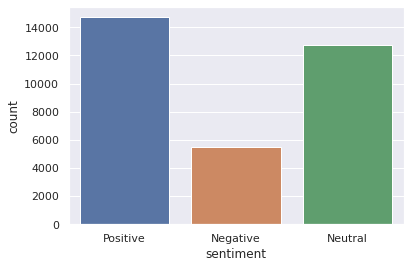

In [19]:
# Generating a countplot for the number of Positive, Negative, and Neutral tweets
sns.set_theme(style = "darkgrid")
sns.countplot(x = df["sentiment"])

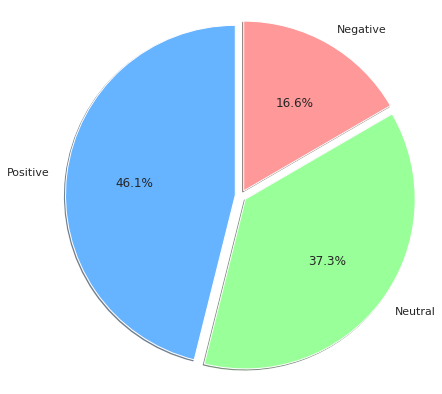

In [22]:
# Generating a pie chart for the ratio of Positive, Negative, and Neutral tweets
fig = plt.gcf()
fig.set_size_inches(7,7)

colors = ["#66b3ff", "#99ff99", "#ff9999"]
plt.pie(df["sentiment"].value_counts(), labels = ("Positive", "Neutral", "Negative"), radius = 3, autopct = "%1.1f%%",
        shadow = True, startangle = 90, labeldistance = 1.1, colors = colors, explode = (0.1,0.1,0.1))
plt.axis('equal')
plt.show();

According to the above two plots, the majority of tweets had a positive sentiment.
This shows that the majority of people had a favourable impression of self-driving cars. However, when the sample size is considered, 16.6 percent remains a rather big amount, and the value will only rise if the sample size is expanded.

In [23]:
# Function for generating Wordcloud
def create_wordcloud(text):
    words = ' '.join([words for words in text])
    wordcloud = WordCloud(width = 800, height = 400, max_font_size = 70, 
                          max_words = 100, background_color = "white").generate(words)
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud, interpolation = "bilinear")
    plt.axis('off')
    plt.show()

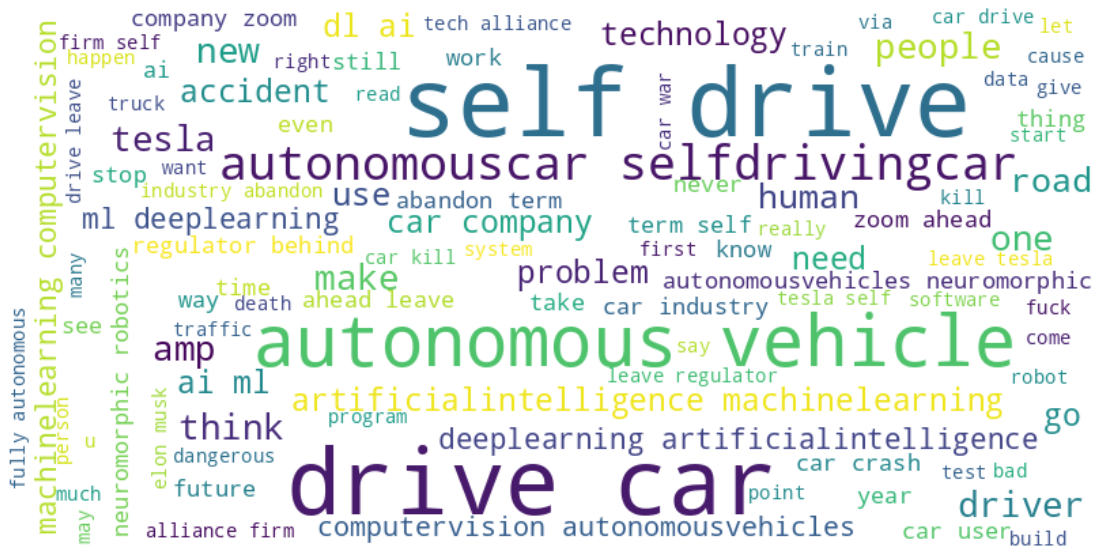

In [45]:
# Generating a Wordcloud for Negative tweets
create_wordcloud(df[df["sentiment"] == "Negative"]["whole_tweet"].values)

Terms like "kill," "death," "hazardous," "accident," and "crash" can be seen in Tweets with the "Negative" mood. This shows that those who have a negative opinion of autonomous cars feel they are unsafe because they have caused accidents that have resulted in the loss of human life. This might cause individuals to be afraid of, much alone test out, this new technology.

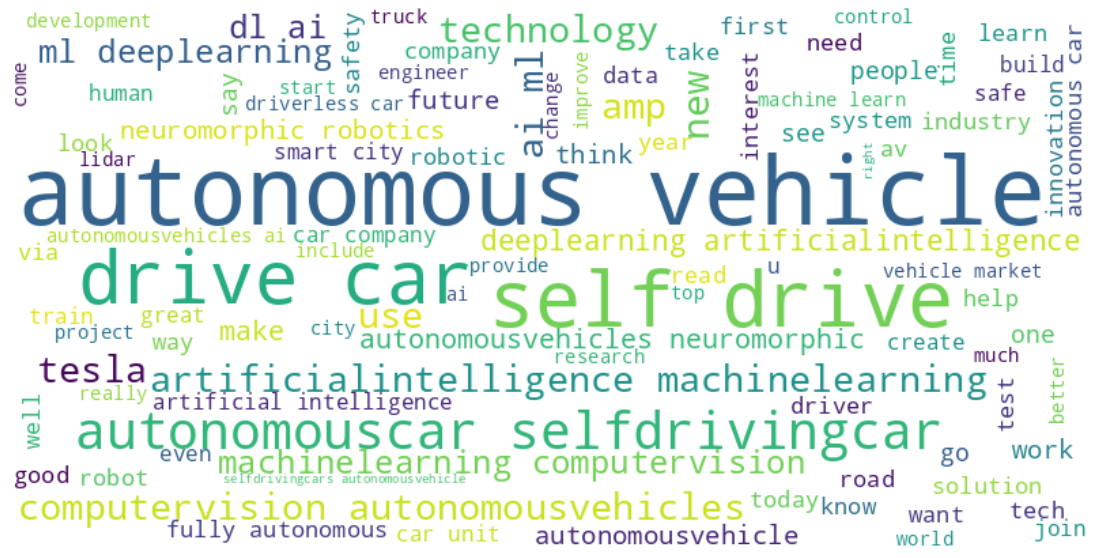

In [46]:
# Generating a Wordcloud for Positive tweets
create_wordcloud(df[df["sentiment"] == "Positive"]["whole_tweet"].values)

Words like "safety," "future," and "innovation" can be seen in Tweets with the "Positive" sentiment. This implies that those who have a good image of autonomous vehicles feel they are safe, as seen by the phrases "safe" and "safety," yet words like "future" and "innovation" show their enthusiasm and interest in this technology.


## Conclusion
Based on this analysis, it can be concluded that the general public had a positive opinion of autonomous vehicles, with some people believing that they were unsafe due to the potential for road accidents.

Of course, there could be some errors in this analysis. VADER will not provide 100 percent accurate compound scores for each tweet's sentiments. The best approach would be to conduct a survey, but this will be impossible if we require a large sample size. So, for the time being, VADER is the best option because it works well with slang and emoticons, which are common in microblogging websites like Twitter. VADER can be used to quickly learn about public sentiment toward a specific product or service.
